# Substructures
Začneme tim, že načteme všechny potřebné baličky, a načteme všechny soubory. Ligandy Cytochromu a Drugbanku leži v promennych <b>cyto_ligands</b> a <b>drugs</b> resp. PAINS latky a jejich nazvy jsou uloženy do promenné <b>pains</b>


In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import seaborn as sns
import pandas as pd
import itertools
from itertools import chain
import csv
import random

d = rdMolDraw2D.MolDraw2DSVG(300,300)

pains = []
with open('p_l15.txt', 'r') as f, open('p_m150.txt', 'r') as p, open('CHEMBL26-chembl_26_activity.csv', 'r') as csvfile:
    for line in chain(f, p):
        pattern, text = line.strip().split('\t') # split by tab
        pains.append([Chem.MolFromSmarts(pattern),
                      text.lstrip("<regId=\"").rstrip("\">")]) # remove the xml tags
    inp = csv.DictReader(csvfile, delimiter=";")
    cyto_ligands = [Chem.MolFromSmiles(el['Smiles']) for el in inp if not el['Smiles'] == None]

suppl = Chem.SDMolSupplier('drugbank.sdf')
drugs = [m for m in suppl if not m == None]


Bad key "text.kerning_factor" on line 4 in
/Users/hanchary/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
RDKit ERROR: [11:26:54] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [11:26:54] ERROR: Could not sanitize molecule ending on line 20009
RDKit WARNING: [11:26:54] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit WARNING: [11:26:54] Warning: conflicting stereochemistry at atom 5 ignored.
RDKit ERROR: [11:26:54] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [11:26:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [11:26:55] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [11:26:55] ERROR: Can't kekulize mol.  Unkekulized 

RDKit ERROR: [11:26:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
RDKit ERROR: 
RDKit ERROR: [11:26:55] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [11:26:55] ERROR: Could not sanitize molecule ending on line 442989
RDKit ERROR: [11:26:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 9 10
RDKit ERROR: 
RDKit ERROR: [11:26:55] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [11:26:55] ERROR: Could not sanitize molecule ending on line 447465
RDKit ERROR: [11:26:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
RDKit ERROR: 
RDKit ERROR: [11:26:55] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [11:26:55] ERROR: Could not sanitize molecule ending on line 466177
RDKit ERROR: [11:26:55] ERROR: Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
RDKit ERROR: 
RDKit ERROR: [11:26:55] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 17
RDKit ERR

RDKit ERROR: [11:26:56] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [11:26:57] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [11:26:57] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [11:26:57] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [11:26:58] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [11:26:58] ERROR: Could not sanitize molecule ending on line 1151592


Dale, zkusime najit latky, ktere obsahuji kyselinu uhličitou, NH2 a take obě skupiny.


In [2]:
carbonic_acid_pattern = Chem.MolFromSmiles('C(=O)(O)O')
nh2_pattern = Chem.MolFromSmiles('[NH2-]')
cyto_with_carbonic = []
cyto_with_nh2 = []
cyto_with_both = []

for el in cyto_ligands:
    if el.HasSubstructMatch(carbonic_acid_pattern):
        cyto_with_carbonic.append(el)
    if el.HasSubstructMatch(nh2_pattern):
        cyto_with_nh2.append(el)
    if el.HasSubstructMatch(carbonic_acid_pattern) and el.HasSubstructMatch(nh2_pattern):
        cyto_with_both.append(el)

print(f'Number of drugs, which contain carbonic acid as substructure - {len(cyto_with_carbonic)}')
print(f'Ration of drugs, which contain carbonic acid as substructure - {len(cyto_with_carbonic)/len(cyto_ligands)*100}%')
print()
print(f'Number of drugs, which contain NH2 as substructure - {len(cyto_with_nh2)}')
print(f'Ration of drugs, which contain NH2 as substructure - {len(cyto_with_nh2)/len(cyto_ligands)*100}%')
print()
print(f'Number of drugs, which contain both groups as substructure - {len(cyto_with_both)}')
print(f'Ration of drugs, which contain both groups as substructure - {len(cyto_with_both)/len(cyto_ligands)*100}%')


Number of drugs, which contain carbonic acid as substructure - 40
Ration of drugs, which contain carbonic acid as substructure - 0.292141396435875%

Number of drugs, which contain NH2 as substructure - 18
Ration of drugs, which contain NH2 as substructure - 0.13146362839614373%

Number of drugs, which contain both groups as substructure - 0
Ration of drugs, which contain both groups as substructure - 0.0%


Vidime, že 40 latek obsahuji kyselinu uhličitou, 18 latek obsahuji NH2, a žadna latka, ktera obsahuje obě skupiny. Ted' vezmeme skvělou funkci <b><i>visualize_match()</i></b> z cvika, a nakreslime te struktury, a zaroveň ukažime, kde přesně jsou te substruktury. Aby ušetřit misto obrazovky, ukažeme jen 2 liganda pro každy pattern, ale po každem spuštění buňky budou to ruzné ligandy, protože použivám nahodné volení indexu pro každy seznam. Čislo indexu je vždy ukazano nad molekulou.


Ligand index in cyto_with_carbonic list is 36



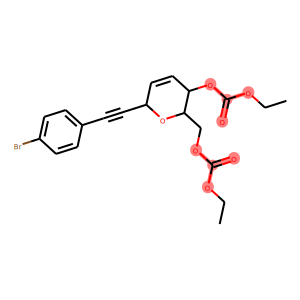

Ligand index in cyto_with_carbonic list is 38



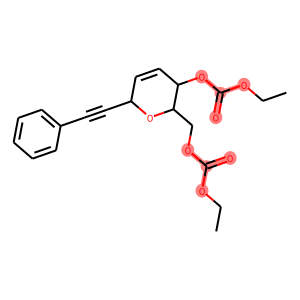

In [5]:
def visualize_match(structure, pattern):
    # GetSubstructMatches grabs all hits, GetSubstructMatch the first one it finds
    hits = structure.GetSubstructMatches(pattern)
    hit_atoms = set()
    hit_bonds = set()
    for hit in hits:
        hit_atoms.update(hit)
        hit_bonds.update([structure.GetBondBetweenAtoms(i, j).GetIdx()
                          for i, j in itertools.combinations(hit_atoms, 2)
                          if structure.GetBondBetweenAtoms(i, j)])
    d = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(d, structure, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    d.FinishDrawing()
    display(SVG(d.GetDrawingText()))


list_len = len(cyto_with_carbonic)
index1 = random.choice([x for x in range(list_len)])
index2 = random.choice([x for x in range(list_len)])

print(f"Ligand index in cyto_with_carbonic list is {index1}\n")
visualize_match(cyto_with_carbonic[index1], carbonic_acid_pattern)
print(f"Ligand index in cyto_with_carbonic list is {index2}\n")
visualize_match(cyto_with_carbonic[index2], carbonic_acid_pattern)


Ligand index in cyto_with_carbonic list is 8



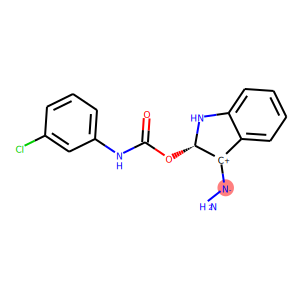

Ligand index in cyto_with_carbonic list is 16



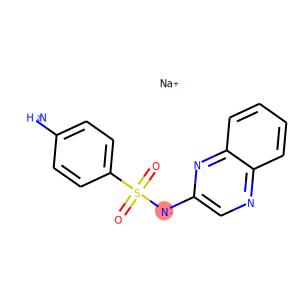

In [8]:
list_len = len(cyto_with_nh2)
index1 = random.choice([x for x in range(list_len)])
index2 = random.choice([x for x in range(list_len)])

print(f"Ligand index in cyto_with_carbonic list is {index1}\n")
visualize_match(cyto_with_nh2[index1], nh2_pattern)
print(f"Ligand index in cyto_with_carbonic list is {index2}\n")
visualize_match(cyto_with_nh2[index2], nh2_pattern)


Ted' zkusime najit latky, ktere obsahuji aminokyselinove stopy. Pro tenhle ukol založime funkci <b>aaContent()</b>. Jako arhument bude mět seznam molekul, jako vystup budeme mět 4 seznamů: 
1. vratí seznám latek, ktere obsahuji jen jednu AK jako substrukturu
2. vratí seznám latek, ktere obsahuji vice AK jako substrukturu
3. seznam počtů toho, kolik AK bylo v každe latce jako substruktura
4. slovnik aminokyselin, ktery obsahuje strukturu aminokyseliny, a počet toho, kolik krat našli jsme ji v seznamu ligandů

Ve slovniku <b>amino_acids</b> držime strukturu a počet setkani s každou AK v datasetu. Latky, ktere obsahuji jen jednu, a vice AK zbytku do promennych <b>one_aa</b> a <b>several_aa</b> resp. Promenna <b>maxx</b> chrani nejhojnější aminokzselinu (jeji nazev a počet). Po splněni, funkce naprintuje (doufam, že je to slovo platí v češtině) zakladni statistiku, a skončí.

In [9]:
def aaContent(mol_list):
    amino_acids = {} 
    for aa in 'ACDEFGHIKLMNPQRSTVWY':
        amino_acids[aa] = [Chem.MolFromFASTA(aa), 0]

    one_aa = []
    several_aa = []
    aa_match_distr = []
    maxx = [0, 0]
    for j, el in enumerate(mol_list):
        entity = [j]
        count = 0
        for aa in amino_acids:
            if el.HasSubstructMatch(amino_acids[aa][0]):
                entity.append(aa)
                amino_acids[aa][1] += 1
                if amino_acids[aa][1] > maxx[1]:
                    maxx = [aa, amino_acids[aa][1]]
                count += 1
        if count >0:
            aa_match_distr.append(count)
        if len(entity) == 2:
            one_aa.append(entity)
        elif len(entity) > 2:
            several_aa.append(entity)

    print(f'Number of molecules, which contain single AA as substructure - {len(one_aa)}')
    print(f'Ration of molecules, which contain AA as substructure - {len(one_aa)/len(mol_list)*100:0.3f}%\n')
    print(f'Number of molecules, which contain several AAs as substructure - {len(several_aa)}')
    print(f'Ration of molecules, which contain proline as substructure - {len(several_aa)/len(mol_list)*100:0.3f}%\n')
    print(f'The most abundant AA is {maxx[0]} which was found as substructure in {maxx[1]} ligands')
    check = True
    for el in amino_acids:
        if amino_acids[el][1] == 0:
            if check:
                print("The AAs which were not found as substructure are: ")
                check = False
            print(" -",el)

    return [one_aa, several_aa, aa_match_distr, amino_acids]

Dobře, ted' pustime ntuto funkci, a uložime vystup do proměnnych <b>cyto_one</b>, <b>cyto_several</b>, <b>cyto_dist</b> a <b>cyto_aa</b>.

In [10]:
cyto_one, cyto_several, cyto_dist, cyto_aa = aaContent(cyto_ligands)

Number of molecules, which contain single AA as substructure - 118
Ration of molecules, which contain AA as substructure - 0.862%

Number of molecules, which contain several AAs as substructure - 762
Ration of molecules, which contain proline as substructure - 5.565%

The most abundant AA is G which was found as substructure in 880 ligands
The AAs which were not found as substructure are: 
 - N
 - R


Ted' zkusime nakreslit pár matchů. Máme 118 ligandů, ktere obsahuji jen jednu AK, a 762 ligandů, ktere obsahuji vice než 1 AK. Nebudeme křeslit to všechno. Nakřeslime prvních 5 matchů z <b>cyto_one</b>. Ohledně <b>cyto_several</b>, tak nenašel jsem metodu, jak bych mohl udělat highlight pro vice než 1 substrukturu, tak prostě vzal jsem jeden ligand, a nakreslil všichní ho matchy. Prvni buňka kresli <b>cyto_one</b>, druha křesli <b>cyto_several</b>.

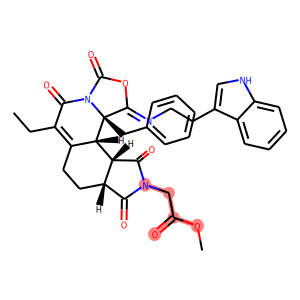

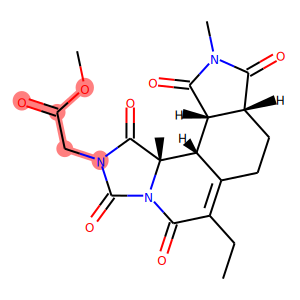

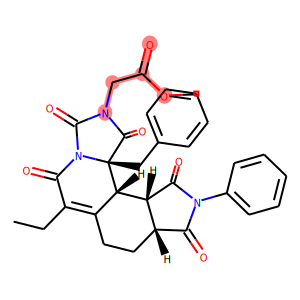

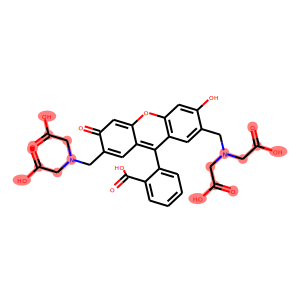

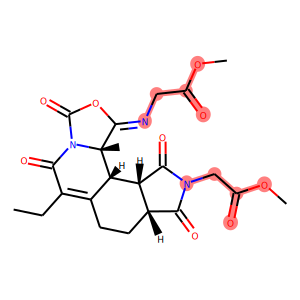

In [11]:
for el in cyto_one[:5]:
    visualize_match(cyto_ligands[el[0]], cyto_aa[el[1]][0])

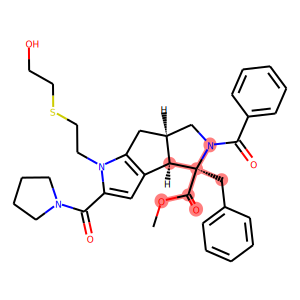

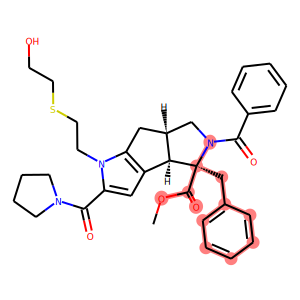

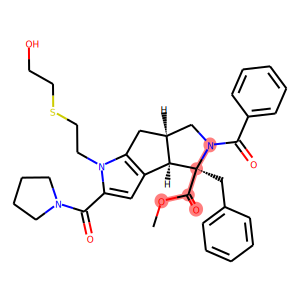

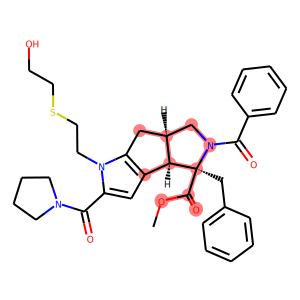

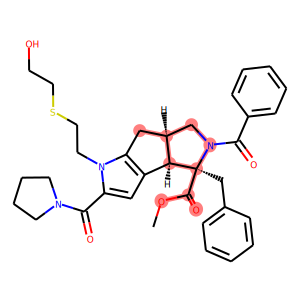

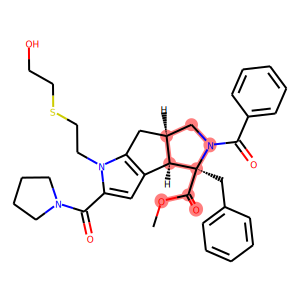

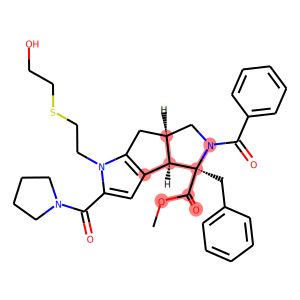

In [12]:
for el in cyto_several[4][1:]:
    visualize_match(cyto_ligands[cyto_several[4][0]], cyto_aa[el][0])

Dobře, ted' nakřeslime distribuci počtu matchů v ligandech, a také celkovou distribuce AK přes dataset.

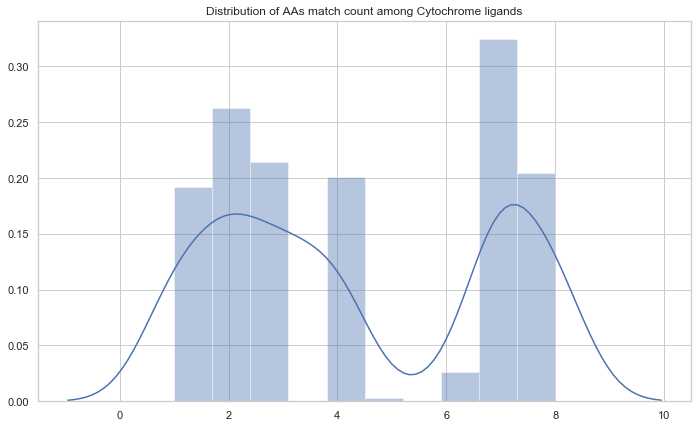

In [13]:
sns.set(rc={'figure.figsize':(11.7, 7)})
with sns.axes_style("whitegrid"):
    p = sns.distplot(cyto_dist, bins=10)
    p.set_title("Distribution of AAs match count among Cytochrome ligands")


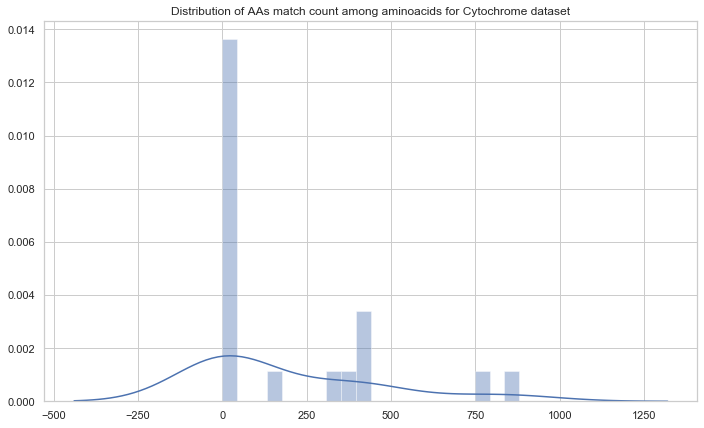

In [14]:
aa_dist = [cyto_aa[el][1] for el in cyto_aa]
sns.set(rc={'figure.figsize':(11.7, 7)})
with sns.axes_style("whitegrid"):
    p = sns.distplot(aa_dist, bins=20)
    p.set_title("Distribution of AAs match count among aminoacids for Cytochrome dataset")

Ted' nakřeslime barplot počtu, pro všichni AK

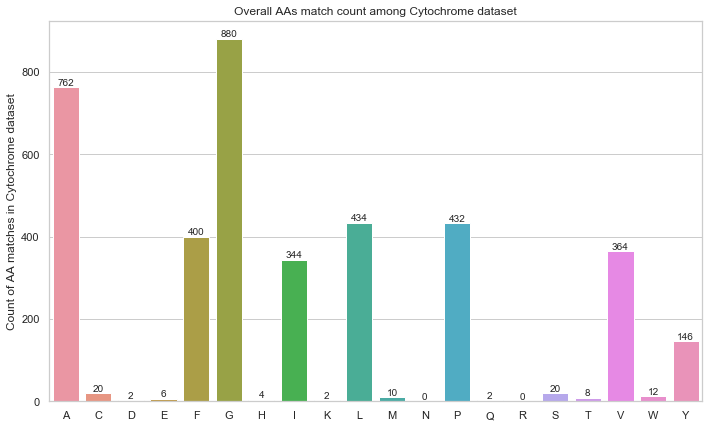

In [16]:
labs = []
vals = []
for el in cyto_aa:
    labs.append(el)
    vals.append(cyto_aa[el][1])

sns.set(rc={'figure.figsize':(11.7, 7)})
with sns.axes_style("whitegrid"):
    p = sns.barplot(x=labs, y=vals)
    p.set_title("Overall AAs match count among Cytochrome dataset")
    p.set_ylabel("Count of AA matches in Cytochrome dataset")
    #p.set_xticklabels(p.get_xticklabels())
    for pat in p.patches:
        p.text(pat.get_x() + pat.get_width()/2., pat.get_height(), '%d' % int(pat.get_height()), 
            fontsize=10, ha='center', va='bottom')


Opakujeme to všechno pro Drugbank dataset, včetně vizualizaci a plotů

In [17]:
drug_one, drug_several, drug_dist, drug_aa = aaContent(drugs)

Number of molecules, which contain single AA as substructure - 163
Ration of molecules, which contain AA as substructure - 2.292%

Number of molecules, which contain several AAs as substructure - 633
Ration of molecules, which contain proline as substructure - 8.899%

The most abundant AA is G which was found as substructure in 796 ligands


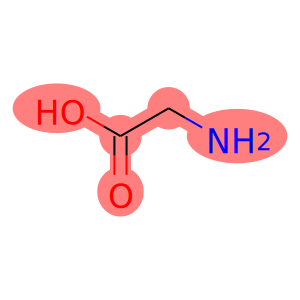

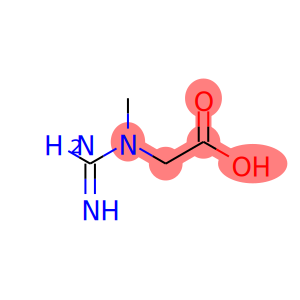

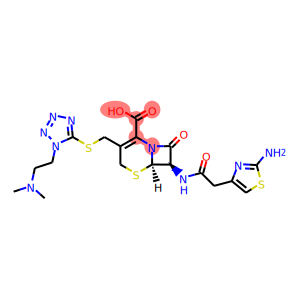

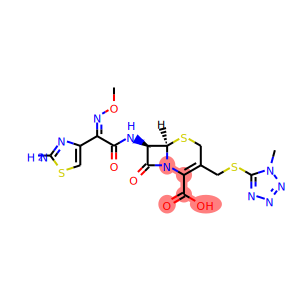

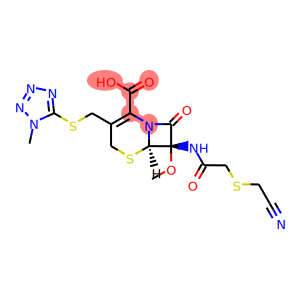

In [18]:
for el in drug_one[:5]:
    visualize_match(drugs[el[0]], drug_aa[el[1]][0])

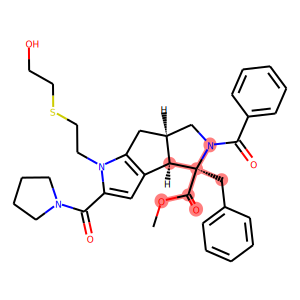

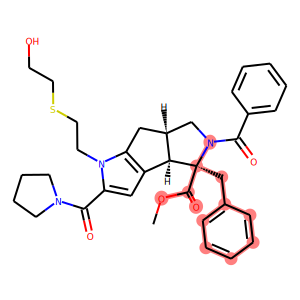

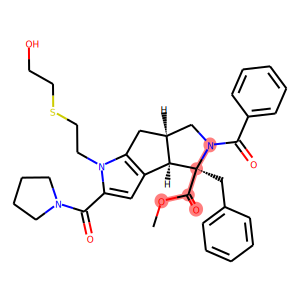

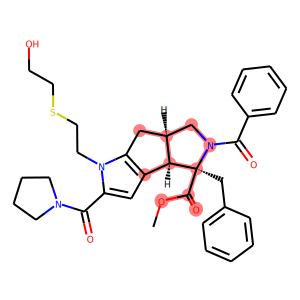

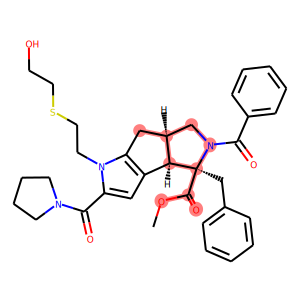

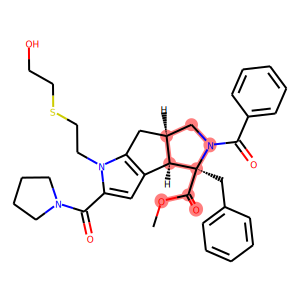

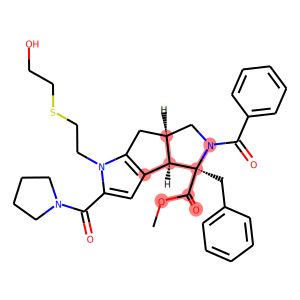

In [19]:
for el in cyto_several[4][1:]:
    visualize_match(cyto_ligands[cyto_several[4][0]], cyto_aa[el][0])

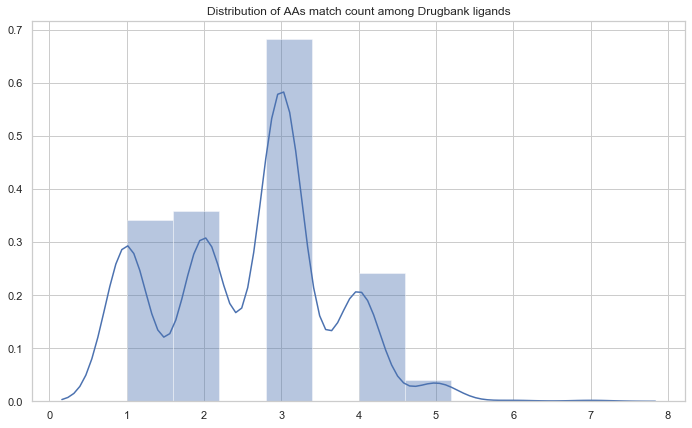

In [20]:
sns.set(rc={'figure.figsize':(11.7, 7)})
with sns.axes_style("whitegrid"):
    p = sns.distplot(drug_dist, bins=10)
    p.set_title("Distribution of AAs match count among Drugbank ligands")

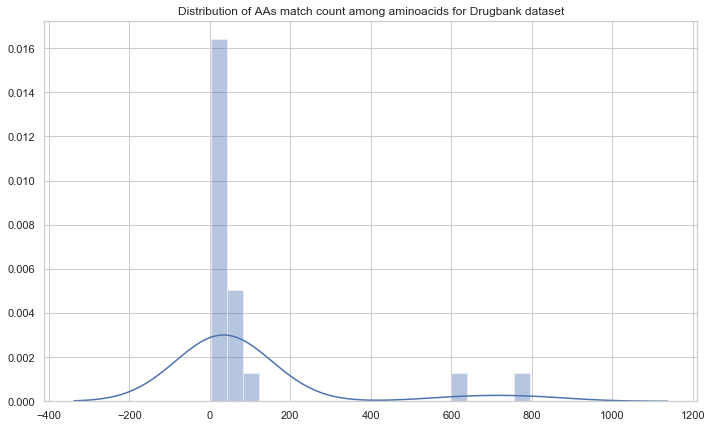

In [21]:
drug_aa_dist = [drug_aa[el][1] for el in drug_aa]
sns.set(rc={'figure.figsize':(11.7, 7)})
with sns.axes_style("whitegrid"):
    p = sns.distplot(drug_aa_dist, bins=20)
    p.set_title("Distribution of AAs match count among aminoacids for Drugbank dataset")

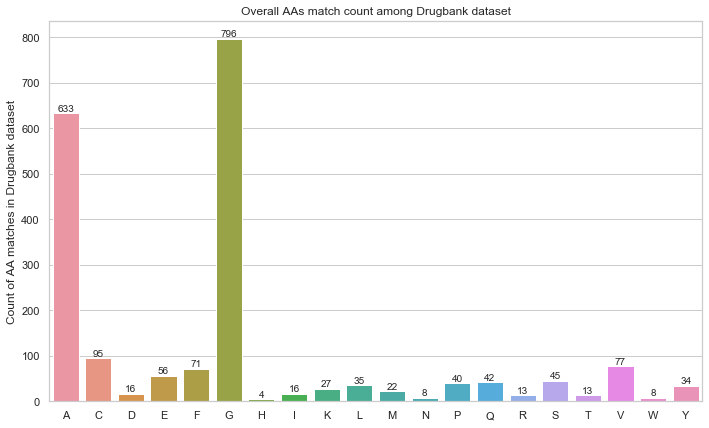

In [22]:
drug_labs = []
drug_vals = []
for el in drug_aa:
    drug_labs.append(el)
    drug_vals.append(drug_aa[el][1])

sns.set(rc={'figure.figsize':(11.7, 7)})
with sns.axes_style("whitegrid"):
    p = sns.barplot(x=drug_labs, y=drug_vals)
    p.set_title("Overall AAs match count among Drugbank dataset")
    p.set_ylabel("Count of AA matches in Drugbank dataset")
    #p.set_xticklabels(p.get_xticklabels())
    for pat in p.patches:
        p.text(pat.get_x() + pat.get_width()/2., pat.get_height(), '%d' % int(pat.get_height()), 
            fontsize=10, ha='center', va='bottom')

Zajimave. Vidime, že oba datasetu mají přiblizně stejny počet ligandu, ktere obsahuji jednu (118 vs. 163) a vice AK (762 vs. 633) ale ratio tech hodnot se liši značněji - 0.862% vs. 2.292% a 5.565% vs. 8.899%. Take pro Drugbank vidime, že jen 2 aminokyseliny jsou v datasetu jako substruktury vice než 100 krat, a jsou to Alanin a Glycin. Take aminokyseliny Asparagin a Arginine vůbec nejsou zastupeny jako substruktury ligandů Cytochromu. Obě jsou polarní. A celkem všichny AK s počtem meňe než 300 v datasetu Cytochromu jsou polarní a ve většine hydrofilní.



In [23]:
import time
cyto_with_pains = []
start = time.time()
for el in cyto_ligands:
    check = False
    for ind, pain in enumerate(pains):
        if el.GetNumAtoms() < pain[0].GetNumAtoms():
            continue
        if el.HasSubstructMatch(pain[0]):
            try:
                el.pain_match.append(ind)
            except:
                el.pain_match = [ind]
            check = True
    if check:
        cyto_with_pains.append(el)
end = time.time()
print(end-start)

42.003276109695435


Ted' udelame vizualizace pro nejaky ligand. Aby nebyl to vždy stejny ligand, tak nahodně zvolime ho index, ale vždy naprintujeme ten index.

Current ligand index is 181

PAINS name is keto_keto_beta_B(12)


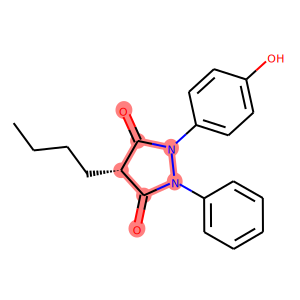

In [25]:
index = random.choice([x for x in range(len(cyto_with_pains))])
print(f"Current ligand index is {index}\n")
for pattern in cyto_with_pains[index].pain_match:
    print(f'PAINS name is {pains[pattern][1]}')
    visualize_match(cyto_with_pains[index], pains[pattern][0])

Zkusel jsem upravit algoritm hledani substruktur pro PAINS, ale nepřišel nikčemu. Jak vidite, trvá to přiblizně 40 sekund, a numužu to snizet. Jen zkuset to implementovat v jinem jazyce, ale nemám na to ted' čas.